/var/folders/c5/00kj5vrd7qd3b5q3c79llp540000gn/T/ipykernel_93712/3440620476.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


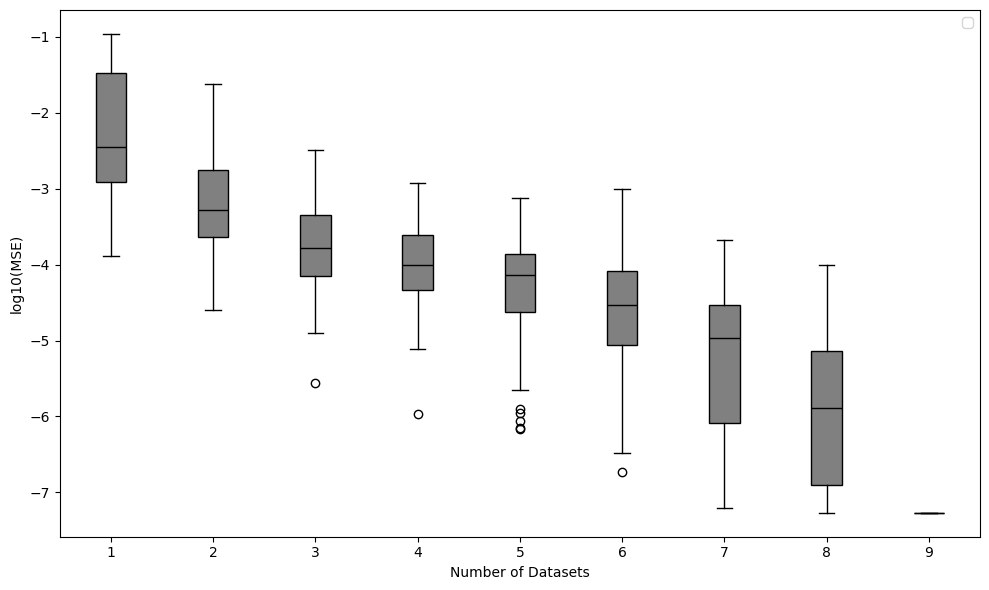

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load file names

data_df = pd.read_csv('Data/data_comparison.csv')
data = data_df[['Number of Files', 'MSE', 'Name']].values

fig, ax = plt.subplots(figsize=(10, 6))

x_all = sorted(set(int(n) for n, _, _ in data))

# Scatter plot
scatter_data = [(int(n), l) for n, l, _ in data]
for x in x_all:
    y_vals = [l for n, l, combo in data if int(n) == x]
    ax.boxplot([y_vals], positions=[x], widths=0.3, patch_artist=True,
                   boxprops=dict(facecolor='grey'),
                   medianprops=dict(color='black'))

ax.set_xlabel('Number of Datasets')
ax.set_ylabel('log10(MSE)')
ax.legend()

plt.tight_layout()
plt.show()

# Save the figure


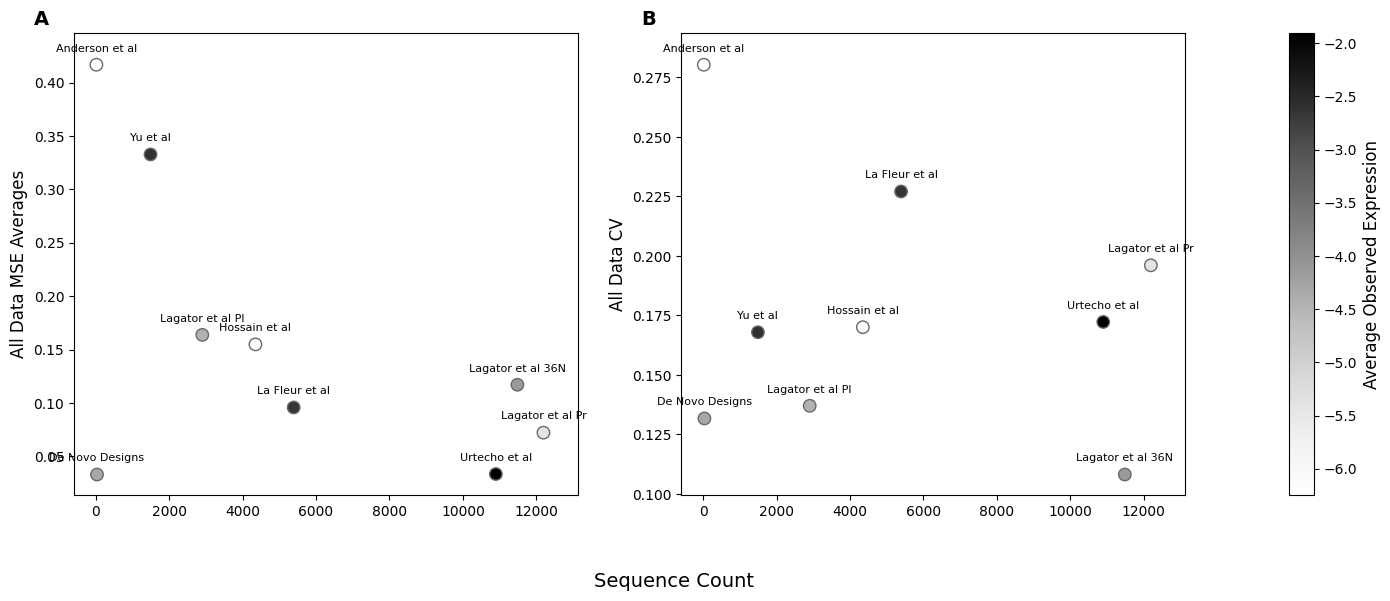

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm, colors as mcolors
from sklearn.preprocessing import MinMaxScaler

def adjust_text_pos(idx, x, y, y_offset, label):
    custom_offsets = {
        ('De Novo Designs', None): (1000, 0),
        ('Anderson et al', None): (1000, 0),
        ('Lagator et al Pr', 0): (-1500, -y_offset * 1.5),
        ('Lagator et al Pr', 1): (-500, 0),
        ('Hossain et al', 1): (-500, 0),
        ('Lagator et al 36N', 1): (-1250, 0),
    }
    dx, dy = custom_offsets.get((label, idx)) or custom_offsets.get((label, None), (0, 0))
    return x + dx, y + dy


MinMaxScaler().fit_transform(df[['Observed log(TX/Txref)']].abs())

# Load data
df = pd.read_csv('Data/CNN_file_metrics.csv')

# Setup figure and axes
fig = plt.figure(figsize=(16, 6))
gs = GridSpec(1, 3, width_ratios=[1, 1, 0.05], wspace=0.3)
axes = [fig.add_subplot(gs[0, i]) for i in range(2)]

# Setup colormap normalization
df['Relative Expression'] = MinMaxScaler().fit_transform(df[['Observed Expression']].abs())
df['Relative Expression Range'] = df[['Observed Expression']]


color_col = 'Relative Expression'
norm = mcolors.Normalize(vmin=df[color_col].min(), vmax=df[color_col].max())
cmap = cm.Greys

x_col = 'Sequence Count'
y_cols = ['All Data MSE Averages', 'All Data CV']

# Plot scatter plots
for idx, (ax, y_col) in enumerate(zip(axes, y_cols)):
    scatter = ax.scatter(
        df[x_col],
        df[y_col],
        c=df[color_col],
        cmap=cmap,
        edgecolor='dimgrey',
        s=80
    )

    # Adjust text annotations
    x_offset = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.025
    y_offset = (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.025

    for _, row in df.iterrows():
        x, y = row[x_col], row[y_col] + y_offset
        label = row['File Name']
        ax.text(x, y, label, fontsize=8, ha='center', va='bottom')
        ##adj_x, adj_y = adjust_text_pos(idx, x, y, y_offset, label)
        ##ax.text(adj_x, adj_y, label, fontsize=8, ha='center', va='bottom')

    ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1] + x_offset)
    ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1] + y_offset)
    ax.set_ylabel(y_col, fontsize=12)
    ax.text(-0.05, 1.05, chr(65 + idx), transform=ax.transAxes,
            ha='right', va='top', fontsize=14, fontweight='bold')

cbar_ax = fig.add_subplot(gs[0, 2])
fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax).set_label(color_col, fontsize=12)
fig.supxlabel(x_col, fontsize=14, y=-0.05)

# Show and save figure
plt.show()


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm, colors as mcolors
from sklearn.preprocessing import MinMaxScaler
from ast import literal_eval


# attempt 1
##df = pd.read_csv('Data/CNN_file_metrics.csv')
##df['Relative Expression'] = df['Observed Expression'].apply(literal_eval).apply(lambda x: [abs(num) for num in x])
##df['Relative Expression'] = df['Relative Expression'].apply(lambda x: MinMaxScaler().fit_transform([[i] for i in x]).flatten())
##df['Relative Expression Range'] = df['Relative Expression'].apply(lambda x: max(x) - min(x))
##df['Relative Expression Range']

df = pd.read_csv('Data/LaFleur_supp.csv')
df['Min-Max Observed'] = MinMaxScaler().fit_transform(df[['Observed log(TX/Txref)']].abs())
df

,File Name,Upstream DNA,Promoter Sequence,Downstream DNA,Observed log(TX/Txref),Normalized Observed log(TX/Txref),Min-Max Observed
0,La Fleur et al,CTCGGTACCAAATTCCAGAA,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATC...,GAATTCGATCAAATTTCGAG,-3.386326,0.751317,0.248683
1,La Fleur et al,CTCGGTACCAAATTCCAGAA,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATG...,GAATTCGATCAAATTTCGAG,-3.392439,0.750868,0.249132
2,La Fleur et al,CTCGGTACCAAATTCCAGAA,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATC...,GAATTCGATCAAATTTCGAG,-3.698903,0.728362,0.271638
3,La Fleur et al,CTCGGTACCAAATTCCAGAA,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATA...,GAATTCGATCAAATTTCGAG,-3.979249,0.707775,0.292225
4,La Fleur et al,CTCGGTACCAAATTCCAGAA,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATA...,GAATTCGATCAAATTTCGAG,-2.577630,0.810706,0.189294
...,...,...,...,...,...,...,...
48762,De Novo Designs,AAAGAGACGCTTTCGAGCGTCTTTTTTCGTTTTGGTCCAACA,GGATCCAAATTACGTCCTTACATATTTGTTGACATGGGTAGCCGCT...,AGCTGTCACCGGATGTGCTTTCCGGTCTGATGAGTCCGTGAGGACG...,-7.299041,0.463978,0.536022
48763,De Novo Designs,AAAGAGACGCTTTCGAGCGTCTTTTTTCGTTTTGGTCCAACA,GGATCCGGTGTAGGTAGGCGTCTAATAATTTCTTGACACCAGGGTA...,AGCTGTCACCGGATGTGCTTTCCGGTCTGATGAGTCCGTGAGGACG...,-7.261548,0.466731,0.533269
48764,De Novo Designs,AAAGAGACGCTTTCGAGCGTCTTTTTTCGTTTTGGTCCAACA,GGATCCCACATGTGTCTGTATCTATATATAATTTGACAAACTCCAA...,AGCTGTCACCGGATGTGCTTTCCGGTCTGATGAGTCCGTGAGGACG...,-7.209849,0.470528,0.529472
48765,De Novo Designs,AAAGAGACGCTTTCGAGCGTCTTTTTTCGTTTTGGTCCAACA,GGATCCATATATATATATATATATATATATATTGACACCATTATCA...,AGCTGTCACCGGATGTGCTTTCCGGTCTGATGAGTCCGTGAGGACG...,-7.222543,0.469596,0.530404


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


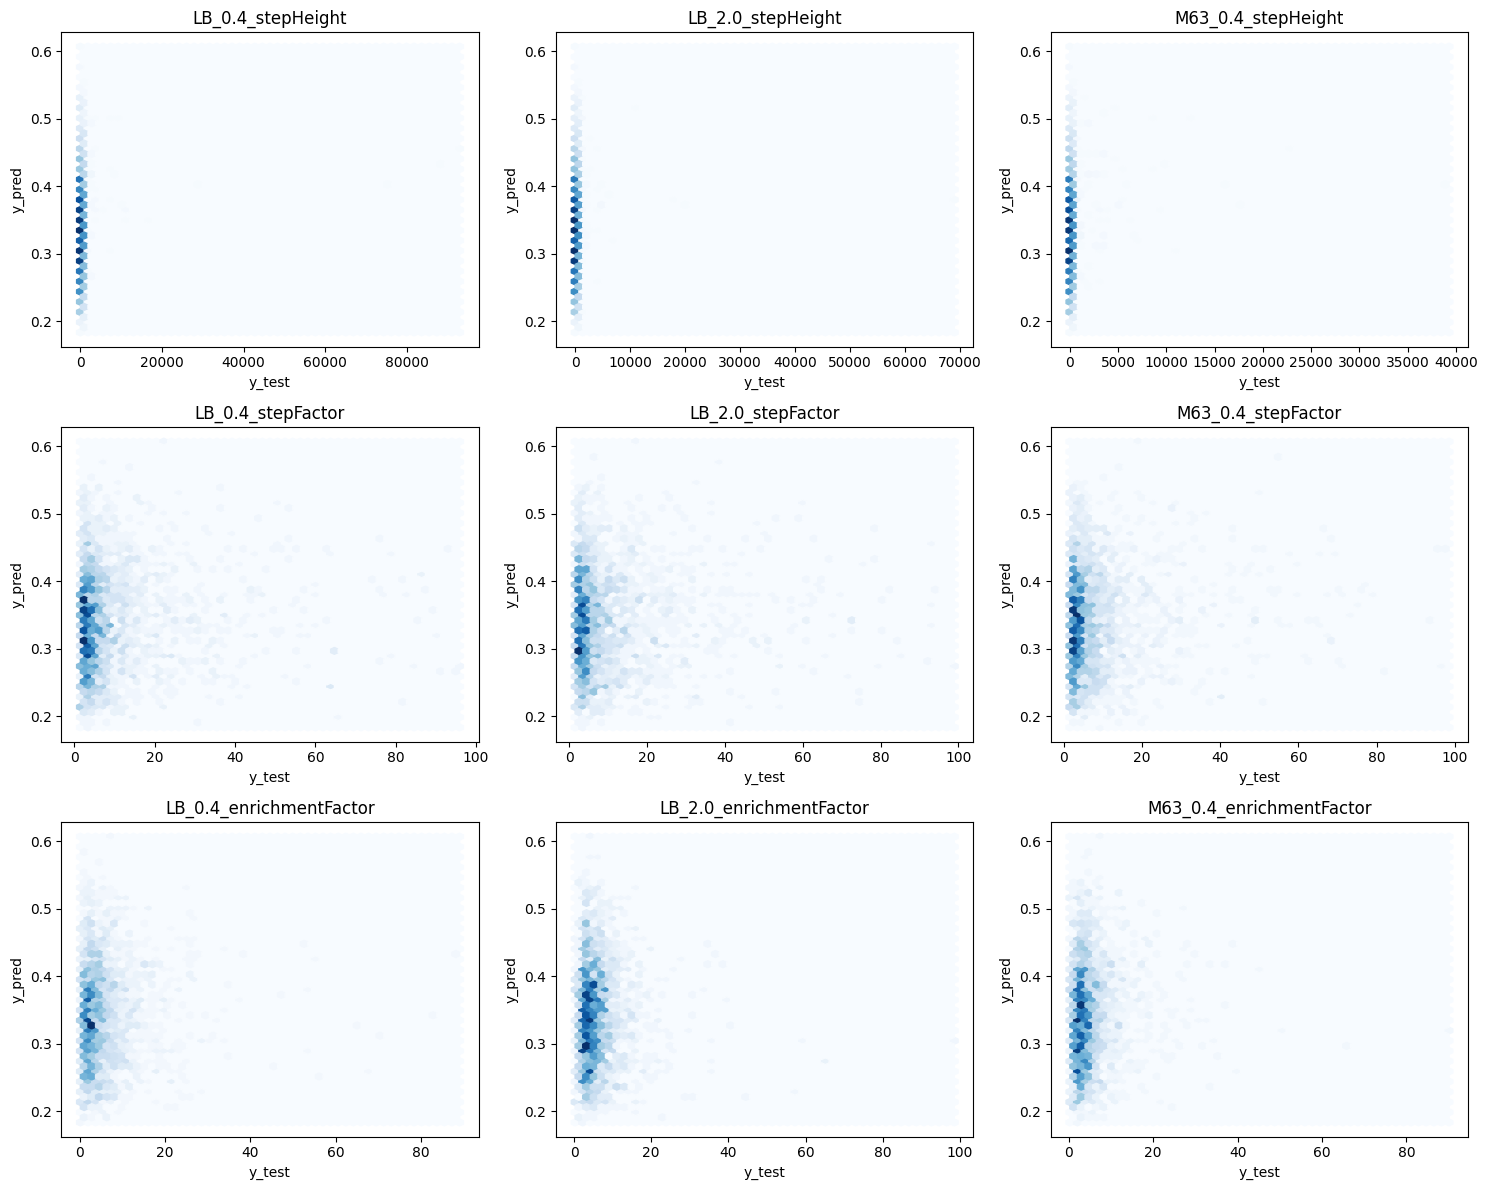

In [44]:
# Thomasan et al data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.saving import load_model  # type: ignore
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer

# -------------------- Data Preprocessing Functions --------------------

def preprocess_sequences(X, max_length=150):
    return np.array([padded_one_hot_encode(seq.zfill(max_length)) for seq in X])

def padded_one_hot_encode(sequence):
    mapping = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], '0': [0, 0, 0, 0]}
    return np.array([mapping[nucleotide.upper()] for nucleotide in sequence])

# Load model and data
model = load_model('Models/CNN_6_1_2.keras')
df = pd.read_csv('Data/Thomasan.csv')

# Remove boolean columns
df = df.drop(columns=['LB_0.4_detected', 'LB_2.0_detected', 'M63_0.4_detected', 'LB_0.4_enriched', 'LB_2.0_enriched', 'M63_0.4_enriched'])

# Remove any row with a value of 100.0 or 0
df = df[((df != 100.0) & (df != 0)).all(axis=1)]

# Extract sequences
X_test = df['Sequence']
X_encoded = preprocess_sequences(X_test)

# Predict once
y_pred = model.predict(X_encoded).flatten()

# Set up subplot grid
columns_to_compare = df.columns[1:]
n_cols = 3
n_rows = int(np.ceil(len(columns_to_compare) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(columns_to_compare):
    y_test = df[col].values

    # graph y_test vs y_pred
    axes[i].hexbin(y_test, y_pred, gridsize=50, cmap='Blues')
    axes[i].set_title(col)
    axes[i].set_xlabel('y_test')
    axes[i].set_ylabel('y_pred')


# Remove extra subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# plt.savefig('Figures/Figure 6 (Thomasan).pdf', dpi=300, bbox_inches='tight')

plt.show()


In [52]:
# Thomasan et al data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.saving import load_model  # type: ignore
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# -------------------- Data Preprocessing Functions --------------------

def preprocess_sequences(X, max_length=150):
    return np.array([padded_one_hot_encode(seq.zfill(max_length)) for seq in X])

def padded_one_hot_encode(sequence):
    mapping = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], '0': [0, 0, 0, 0]}
    return np.array([mapping[nucleotide.upper()] for nucleotide in sequence])

# Load model and data
model = load_model('Models/CNN_6_1_2.keras')
df = pd.read_csv('Data/Thomasan.csv')

# Remove boolean columns
df = df.drop(columns=['LB_0.4_detected', 'LB_2.0_detected', 'M63_0.4_detected', 'LB_0.4_enriched', 'LB_2.0_enriched', 'M63_0.4_enriched'])

# Remove any row with a value of 100.0 or 0
df = df[((df != 100.0) & (df != 0)).all(axis=1)]

# Extract sequences
X_test = df['Sequence']
X_encoded = preprocess_sequences(X_test)

# Predict once
y_pred = model.predict(X_encoded).flatten()

# Quantile transform predicted values
qt_pred = QuantileTransformer(output_distribution='uniform')
y_pred_q = qt_pred.fit_transform(y_pred.reshape(-1, 1)).flatten()

# Set up subplot grid
columns_to_compare = df.columns[1:]

out_dic={}

for i, col in enumerate(columns_to_compare):
    y_test = df[col].values
    qt_test = QuantileTransformer(output_distribution='uniform')
    y_test_q = qt_test.fit_transform(y_test.reshape(-1, 1)).flatten()

    model = LinearRegression()
    model.fit(np.array(y_test_q).reshape(-1, 1), y_pred_q)
    lin_y_pred_q = model.predict(np.array(y_test_q).reshape(-1, 1))

    mse_active = mean_squared_error(y_test_q, lin_y_pred_q)
    rmse_active = root_mean_squared_error(y_test_q, lin_y_pred_q)
    r2_active = r2_score(y_test_q, lin_y_pred_q)

    x = np.array([y_test_q.min(), y_test_q.max()]).reshape(-1, 1)
    y = model.predict(x)

    corr_coef, p_value = pearsonr(y_test_q, y_pred_q)

    textstr = f"{col}\t{mse_active}\t{rmse_active}\t{r2_active}\t{p_value}"
    out_dic[i]= [col, mse_active, rmse_active, r2_active, p_value]

df = pd.DataFrame.from_dict(out_dic, orient='index', columns=["Thomason dataset", "MSE", "RMSE", "Rsquared", "p-value"])
df.to_csv('Figures/TableS1.csv', index=False)
df

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


,Thomason dataset,MSE,RMSE,Rsquared,p-value
0,LB_0.4_stepHeight,0.057568,0.239933,0.309972,1.310080e-14
1,LB_2.0_stepHeight,0.054497,0.233445,0.346693,2.292557e-18
2,M63_0.4_stepHeight,0.059366,0.243651,0.288332,1.172558e-12
3,LB_0.4_stepFactor,0.074196,0.272389,0.110429,1.019898e-02
4,LB_2.0_stepFactor,0.082404,0.287060,0.012180,7.825880e-01
5,M63_0.4_stepFactor,0.074431,0.272820,0.107675,1.231299e-02
6,LB_0.4_enrichmentFactor,0.077051,0.277581,0.076195,7.915618e-02
7,LB_2.0_enrichmentFactor,0.079966,0.282783,0.041398,3.446547e-01
8,M63_0.4_enrichmentFactor,0.069402,0.263442,0.167984,7.007203e-05


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


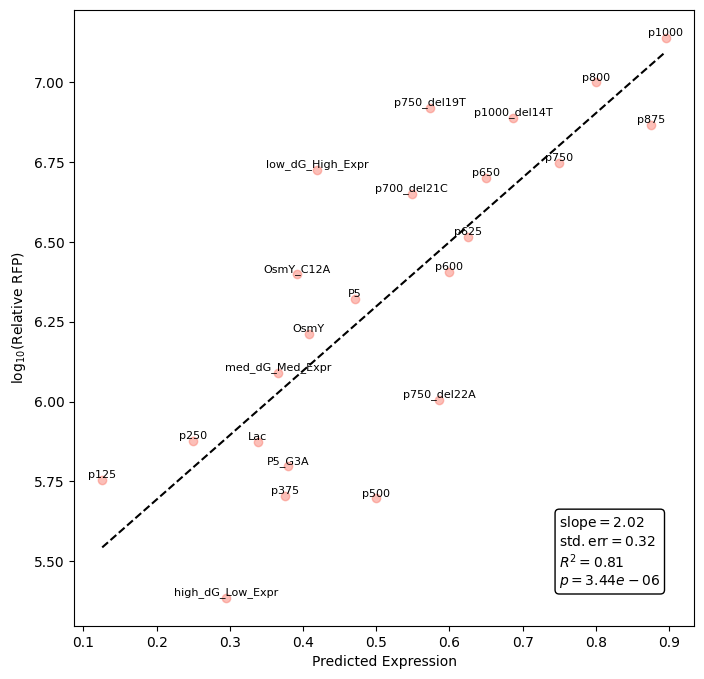

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras


#  ----------------- Preprocessing Functions -----------------

def pad(sequence):
    sequence = sequence.replace('_', '')
    desired_length = 150
    
    # add sepcial padding for GFP (not inserted in the plasmid)
    if sequence == 'CGATGGTGTCAACGTAAATGCATGCCGCTGGTCTCT':
        upstream = 'TATCATGCCATACCGCGAAAGGTTTTGCACCATT'
    else:
        upstream = 'AATACTAGAGGTCTTCCGAC'

    downstream = 'GCGGGAAGACAACTAGGGG'
    sequence = upstream + sequence + downstream
    return sequence.zfill(desired_length)

def padded_one_hot_encode(sequence):
    mapping = {'A': [1,0,0,0], 'C': [0,1,0,0], 'G': [0,0,1,0], 'T': [0,0,0,1], '0': [0,0,0,0]}
    encoding = [mapping[nucleotide.upper()] for nucleotide in sequence]
    return encoding

# ------------- Load the RPF Data -------------

df = pd.read_table('Data/RFP/Observed_RFP_GFP.txt')
seq_map = pd.read_table('Data/RFP/Sequences.txt')

df.loc[:, 'Ec'] = df['Ec'].astype(int)
seq_map.loc[:, 'Ec'] = seq_map['Ec'].astype(int)
df = df.merge(seq_map, on='Ec', how='left')

# load the model
model = keras.saving.load_model('Models/CNN_6_1_2.keras')

# preprocess the sequences
sequences = df['sequence'].apply(lambda x: x.replace('_', '')).tolist()
padded_sequences = [pad(seq) for seq in sequences]
encoded_sequences = np.array([padded_one_hot_encode(seq) for seq in padded_sequences])

# predict the RFP values
df['Pred_RFP'] = model.predict(encoded_sequences, batch_size=32, verbose=1)

# ----------------- Plot Predicted vs Observed RFP -----------------

from scipy.stats import linregress

df_filtered = df.copy()
df_filtered = df_filtered[df_filtered['Description'] != 'pClone_GFP']
df_filtered['log_RFP'] = np.log10(df_filtered['Rel_RFP'])

x_vals = []
y_vals = []

plt.figure(figsize=(8, 8))
for idx, row in df_filtered.iterrows():
    name = row['Description']

    x = row['Pred_RFP']
    y = row['log_RFP']

    x_vals.append(x)
    y_vals.append(y)

    plt.scatter(x, y, color='salmon', label=name, alpha=0.5)
    plt.text(x, y, name, fontsize=8, ha='center', va='bottom')

slope, intercept, r_value, p_value, std_err = linregress(x_vals, y_vals)

x_range = np.linspace(min(x_vals), max(x_vals), 100)
y_pred = slope * x_range + intercept
plt.plot(x_range, y_pred, color='black', linestyle='--', label='Linear Fit')

plt.xlabel('Predicted Expression')
plt.ylabel('log$_{10}$(Relative RFP)')

textstr = '\n'.join((
        r'$\mathrm{slope}=%.2f$' % slope,
        r'$\mathrm{std.err}=%.2f$' % std_err,
        r'$R^2=%.2f$' % r_value,
        r'$p=%.2e$' % p_value
    ))

props = dict(boxstyle='round', facecolor='white')
plt.text(0.75, 5.65, textstr, fontsize=10, verticalalignment='top', bbox=props)
# fig.savefig('Figures/Figure 8.pdf', dpi=300, bbox_inches='tight')

plt.show()
